# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



In [99]:
#@title Librerias 
import numpy as np 
import matplotlib.pylab as plt
import scipy as sp
from scipy.integrate import quad
from scipy.integrate import odeint

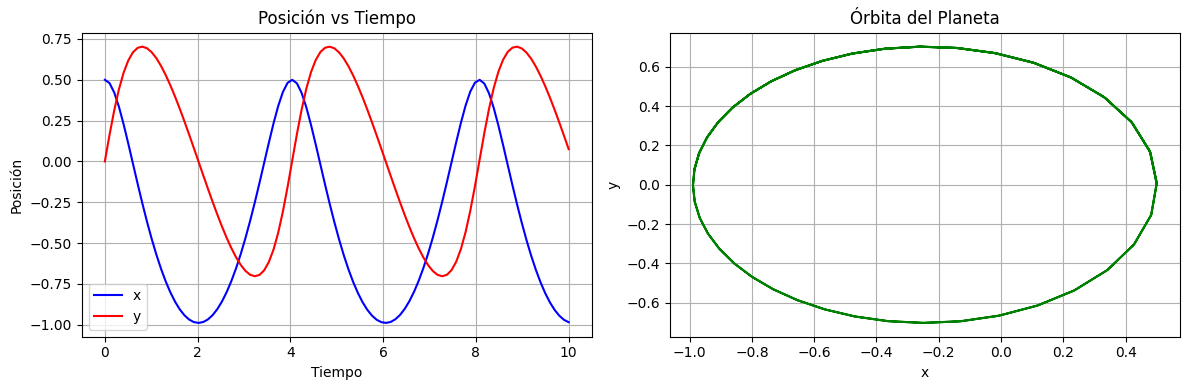

In [106]:
#@title Solución 
GM=1
y0=np.array([0.5,0,0,1.63]) #array de las condiciones iniciales
t=np.linspace(0,10)

# Definiendo las ecuaciones diferenciales
def planet_orbits(y, t):
    x, dxdt, y, dydt = y
    r = np.sqrt(x**2 + y**2)
    d2xdt2 = -x / r**3
    d2ydt2 = -y / r**3
    return [dxdt, d2xdt2, dydt, d2ydt2]

# Condiciones iniciales
y0 = [0.5, 0.0, 0.0, 1.63]  
t = np.linspace(0, 10, 100) 
#resolviendo las ecuaciones diferenciales 
sol = odeint(planet_orbits, y0, t)
x = sol[:, 0]
y = sol[:, 2]
# Graficas 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t, x, label='x',color='blue')
axes[0].plot(t, y, label='y',color='red')
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('Posición')
axes[0].set_title('Posición vs Tiempo')
axes[0].legend()
axes[0].grid()
axes[1].plot(x, y,color='green')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Órbita del Planeta')
axes[1].grid()
plt.tight_layout()
plt.show()



### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



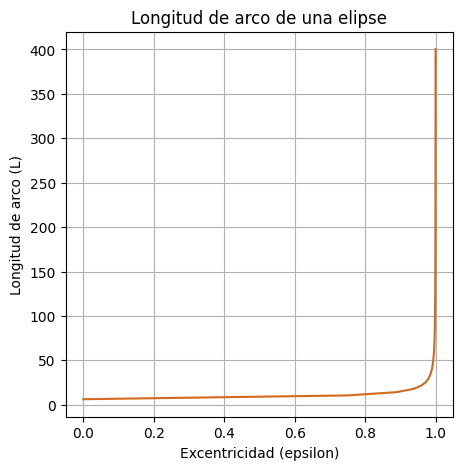

In [107]:
#@title punto 1 
b=1 
a=np.linspace(1,100,100)
#conjunto de excentricidades 
def ε(a,b=1):
  k2=(a**2-b**2)/(a**2)
  return k2

exc=ε(a,b=1)

 # Función a integrar
def integrand(phi,epsilon):
     return np.sqrt(1 - epsilon**2 * np.sin(phi)**2)

#Integrando por el método de quad
L=np.zeros(len(exc))
for i,epsilon in enumerate(exc):
  value,error=quad(integrand,0,np.pi/2,args=(epsilon,))
  L[i]=4*a[i]*value

#Graficando 
plt.figure(figsize=(5,5))
plt.plot(exc, L,color='chocolate')
plt.xlabel('Excentricidad (epsilon)')
plt.ylabel('Longitud de arco (L)')
plt.title('Longitud de arco de una elipse')
plt.grid(True)
plt.show()

In [ ]:
#@title punto 2


### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [109]:
def autovectores_valores(theta):
   theta= np.deg2rad(theta)
  #se define la matriz de rotacion con el theta determinado
   A=np.asmatrix([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
   #polinomio caracteristico
   pol=np.poly(A)
   A_values,A_vectores=np.linalg.eig(A) # Autovalores y autovectores 
   #matriz diagonal 
   D=np.diag(A_values)
   
   #crearé un diccionario que contenga toda la información
   resultados = {
        "Polinomio característico": pol,
        "Autovalores": A_values,
        "Autovectores": A_vectores,
        "Matriz diagonal D": D
    }
   return resultados

#=========
theta=45
resultados= autovectores_valores(theta)
polinomio_caracteristico = resultados["Polinomio característico"]
autovalores = resultados["Autovalores"]
autovectores = resultados["Autovectores"]
matriz_diagonal = resultados["Matriz diagonal D"]